In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [8]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [9]:
autoencoder = Sequential([encoder, decoder])

In [20]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer=SGD(lr=1.5), metrics=['accuracy'])

In [21]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 26s 430us/sample - loss: 0.2101 - accuracy: 0.7945 - val_loss: 0.1747 - val_accuracy: 0.7991
Epoch 2/5
60000/60000 [==============================] - 25s 413us/sample - loss: 0.1643 - accuracy: 0.8012 - val_loss: 0.1547 - val_accuracy: 0.8024
Epoch 3/5
60000/60000 [==============================] - 24s 401us/sample - loss: 0.1536 - accuracy: 0.8030 - val_loss: 0.1490 - val_accuracy: 0.8020
Epoch 4/5
60000/60000 [==============================] - 24s 405us/sample - loss: 0.1474 - accuracy: 0.8042 - val_loss: 0.1457 - val_accuracy: 0.8046
Epoch 5/5
60000/60000 [==============================] - 25s 410us/sample - loss: 0.1411 - accuracy: 0.8054 - val_loss: 0.1367 - val_accuracy: 0.8068


In [22]:
passed_images = autoencoder.predict(X_test[:10])

Original Image:


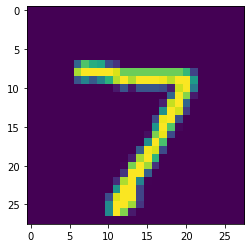

Re-Constructed Image:


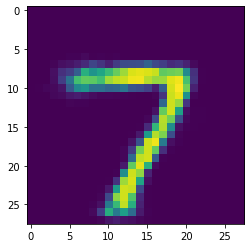

In [23]:
print("Original Image:")
plt.imshow(X_test[0])
plt.show()
print("Re-Constructed Image:")
plt.imshow(passed_images[0])

## Noise

In [24]:
from tensorflow.keras.layers import GaussianNoise

In [25]:
sample = GaussianNoise(0.2)

In [27]:
noisey = sample(X_test[:10], training=True)

Original Image:


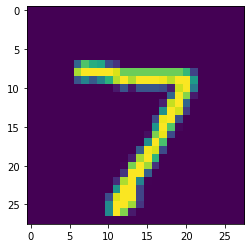

Noisey Image:


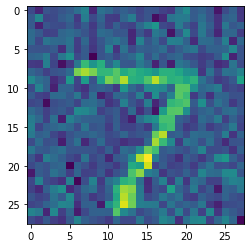

In [28]:
print("Original Image:")
plt.imshow(X_test[0])
plt.show()
print("Noisey Image:")
plt.imshow(noisey[0])

In [30]:
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [31]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [32]:
noise_remover = Sequential([encoder, decoder])

In [33]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
noise_remover.fit(X_train, X_train, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 30s 501us/sample - loss: 0.1681 - accuracy: 0.8013
Epoch 2/8
60000/60000 [==============================] - 27s 458us/sample - loss: 0.1288 - accuracy: 0.8081
Epoch 3/8
60000/60000 [==============================] - 28s 471us/sample - loss: 0.1197 - accuracy: 0.8098
Epoch 4/8
60000/60000 [==============================] - 28s 467us/sample - loss: 0.1143 - accuracy: 0.8107
Epoch 5/8
60000/60000 [==============================] - 28s 463us/sample - loss: 0.1103 - accuracy: 0.8113- loss: 0.1104 - accura - ETA: 1s - - ETA: 0s - loss: 0.1103 - 
Epoch 6/8
60000/60000 [==============================] - 29s 480us/sample - loss: 0.1078 - accuracy: 0.8117- loss: 0.1078 - accuracy
Epoch 7/8
60000/60000 [==============================] - 29s 482us/sample - loss: 0.1060 - accuracy: 0.8119
Epoch 8/8
60000/60000 [==============================] - 28s 462us/sample - loss: 0.1047 - accuracy: 0.8121


In [35]:
noisey_images = sample(X_test[:10], training=True)

In [36]:
denoised = noise_remover(noisey_images)

Original Image:


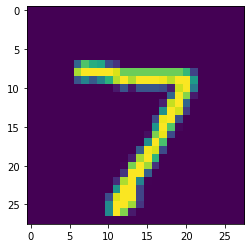

Noisey Image:


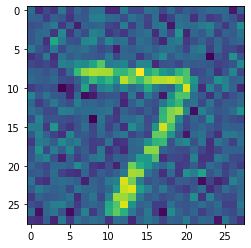

After Noise Removal:


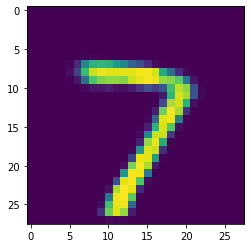

In [40]:
print("Original Image:")
plt.imshow(X_test[0])
plt.show()
print("Noisey Image:")
plt.imshow(noisey_images[0])
plt.show()
print("After Noise Removal:")
plt.imshow(denoised[0])
plt.show()